In [1]:
import geopandas as gpd

# Load the GeoJSON files for Northern, Central, and Southern regions
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Inspect the columns of each region
print("Northern Region Columns:\n", gdf_Northern.columns)
print("\nCentral Region Columns:\n", gdf_Central.columns)
print("\nSouthern Region Columns:\n", gdf_Southern.columns)


Northern Region Columns:
 Index(['h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'waterbody_dist',
       'waterway_dist', 'road_dist', 'hydro', 'index', 'theo_turbines',
       'theo_pv', 'index_right_renamed', 'country',
       'Northern road construction costs',
       'Northern trucking transport and conversion costs',
       'Northern trucking state',
       'Northern pipeline transport and conversion costs',
       'Northern trucking solar capacity', 'Northern trucking wind capacity',
       'Northern trucking hydro capacity',
       'Northern trucking electrolyzer capacity',
       'Northern trucking battery capacity',
       'Northern trucking H2 storage capacity',
       'Northern trucking production cost', 'Northern pipeline solar capacity',
       'Northern pipeline wind capacity', 'Northern pipeline hydro capacity',
       'Northern pipeline electrolyzer capacity',
       'Northern pipeline battery capacity',
       'Northern pipeline H2 storage capacity',
       'Northern 

In [2]:
import numpy as np

# Define demand centers for each region
demand_centers = ['Northern', 'Central', 'Southern']

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# List of GeoDataFrames for each region
gdfs = [gdf_Northern, gdf_Central, gdf_Southern]

# Iterate over each region and calculate counts
for i, gdf in enumerate(gdfs):
    demand_center = demand_centers[i]
    
    # Calculate pipeline and trucking counts
    pipeline_count = np.sum(gdf[f'{demand_center} pipeline total cost'] == gdf[f'{demand_center} lowest cost'])
    trucking_count = np.sum(gdf[f'{demand_center} trucking total cost'] == gdf[f'{demand_center} lowest cost'])
    total_count = pipeline_count + trucking_count

    # Calculate percentages
    pipeline_percentage = (pipeline_count / total_count) * 100 if total_count != 0 else 0
    trucking_percentage = (trucking_count / total_count) * 100 if total_count != 0 else 0

    # Print results for the region
    print(f"{demand_center} Region:")
    print(f"Pipeline: {pipeline_count} ({pipeline_percentage:.2f}%), Trucking: {trucking_count} ({trucking_percentage:.2f}%)\n")


Northern Region:
Pipeline: 4 (0.42%), Trucking: 942 (99.58%)

Central Region:
Pipeline: 4 (0.43%), Trucking: 920 (99.57%)

Southern Region:
Pipeline: 5 (0.58%), Trucking: 864 (99.42%)



In [27]:
# Assume we have three regions: Northern, Central, Southern
regions = ['Northern', 'Central', 'Southern']
gdfs = [gdf_Northern, gdf_Central, gdf_Southern]

# Initialize the LaTeX table content
table_data = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{|c|c|c|c|c|}
\\hline
\\textbf{Region} & \\textbf{Cost Type} & \\textbf{Min Cost (\$/kg)} & \\textbf{Avg Cost (\$/kg)} \\\\
\\hline
"""

# Loop through each region and add rows for pipeline and trucking costs
for i, region in enumerate(regions):
    gdf = gdfs[i]  # Select corresponding GeoDataFrame
    
    # Add rows for pipeline costs
    table_data += f"{region} & Pipeline Production Cost & {gdf[f'{region} pipeline production cost'].min():.2f} & {gdf[f'{region} pipeline production cost'].mean():.2f} \\\\\n"
    table_data += f" & Pipeline Total Cost & {gdf[f'{region} pipeline total cost'].min():.2f} & {gdf[f'{region} pipeline total cost'].mean():.2f} \\\\\n"
    
    # Add rows for trucking costs
    table_data += f" & Trucking Production Cost & {gdf[f'{region} trucking production cost'].min():.2f} & {gdf[f'{region} trucking production cost'].mean():.2f} \\\\\n"
    table_data += f" & Trucking Total Cost & {gdf[f'{region} trucking total cost'].min():.2f} & {gdf[f'{region} trucking total cost'].mean():.2f} \\\\\n"
    table_data += "\\hline\n"

# Finalize the table
table_data += """
\\end{tabular}
\\caption{Minimum and Average Costs for Northern, Central, and Southern Regions (in \$/kg)}
\\label{tab:min_avg_costs_regions}
\\end{table}
"""

# Print the LaTeX table code
print(table_data)



\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{Region} & \textbf{Cost Type} & \textbf{Min Cost (\$/kg)} & \textbf{Avg Cost (\$/kg)} \\
\hline
Northern & Pipeline Production Cost & 2.10 & 7.62 \\
 & Pipeline Total Cost & 2.70 & 14.66 \\
 & Trucking Production Cost & 2.38 & 7.79 \\
 & Trucking Total Cost & 2.74 & 8.34 \\
\hline
Central & Pipeline Production Cost & 2.31 & 11.12 \\
 & Pipeline Total Cost & 3.15 & 15.65 \\
 & Trucking Production Cost & 2.54 & 11.27 \\
 & Trucking Total Cost & 2.89 & 11.74 \\
\hline
Southern & Pipeline Production Cost & 2.31 & 11.11 \\
 & Pipeline Total Cost & 3.88 & 13.98 \\
 & Trucking Production Cost & 2.43 & 11.22 \\
 & Trucking Total Cost & 2.83 & 11.74 \\
\hline

\end{tabular}
\caption{Minimum and Average Costs for Northern, Central, and Southern Regions (in \$/kg)}
\label{tab:min_avg_costs_regions}
\end{table}



In [5]:
trucking_columns_northern = [
    'h3_index',
    'Northern road construction costs',
    'Northern trucking transport and conversion costs',
    'Northern trucking state',
    'Northern trucking solar capacity', 'Northern trucking wind capacity',
    'Northern trucking hydro capacity',
    'Northern trucking electrolyzer capacity',
    'Northern trucking battery capacity',
    'Northern trucking H2 storage capacity',
    'Northern trucking production cost',
    'Lowest water cost',
    'Northern trucking total cost',
    'Northern trucking battery costs',
    'Northern LCOH - trucking battery costs portion',
    'Northern trucking electrolyzer costs',
    'Northern LCOH - trucking electrolyzer portion',
    'Northern trucking H2 storage costs',
    'Northern LCOH - trucking H2 storage portion',
    'Northern trucking wind costs',
    'Northern LCOH - trucking wind portion',
    'Northern trucking solar costs',
    'Northern LCOH - trucking solar portion',
    'Northern trucking hydro costs',
    'Northern LCOH - trucking hydro portion',
    'Northern lowest cost',
    'geometry'
]

pipeline_columns_northern = [
    'h3_index', 
    'Northern pipeline transport and conversion costs',
    'Northern pipeline solar capacity', 'Northern pipeline wind capacity',
    'Northern pipeline hydro capacity',
    'Northern pipeline electrolyzer capacity',
    'Northern pipeline battery capacity',
    'Northern pipeline H2 storage capacity',
    'Northern pipeline production cost',
    'Lowest water cost',
    'Northern pipeline total cost',
    'Northern pipeline battery costs',
    'Northern LCOH - pipeline battery costs portion',
    'Northern pipeline electrolyzer costs',
    'Northern LCOH - pipeline electrolyzer portion',
    'Northern pipeline H2 storage costs',
    'Northern LCOH - pipeline H2 storage portion',
    'Northern pipeline wind costs',
    'Northern LCOH - pipeline wind portion',
    'Northern pipeline solar costs',
    'Northern LCOH - pipeline solar portion',
    'Northern pipeline hydro costs',
    'Northern LCOH - pipeline hydro portion',
    'Northern lowest cost',
    'geometry'
]

trucking_columns_central = [
    'h3_index',
    'Central road construction costs',
    'Central trucking transport and conversion costs',
    'Central trucking state',
    'Central trucking solar capacity', 'Central trucking wind capacity',
    'Central trucking hydro capacity',
    'Central trucking electrolyzer capacity',
    'Central trucking battery capacity',
    'Central trucking H2 storage capacity',
    'Central trucking production cost',
    'Lowest water cost',
    'Central trucking total cost',
    'Central trucking battery costs',
    'Central LCOH - trucking battery costs portion',
    'Central trucking electrolyzer costs',
    'Central LCOH - trucking electrolyzer portion',
    'Central trucking H2 storage costs',
    'Central LCOH - trucking H2 storage portion',
    'Central trucking wind costs',
    'Central LCOH - trucking wind portion',
    'Central trucking solar costs',
    'Central LCOH - trucking solar portion',
    'Central trucking hydro costs',
    'Central LCOH - trucking hydro portion',
    'Central lowest cost',
    'geometry'
]

pipeline_columns_central = [
    'h3_index', 
    'Central pipeline transport and conversion costs',
    'Central pipeline solar capacity', 'Central pipeline wind capacity',
    'Central pipeline hydro capacity',
    'Central pipeline electrolyzer capacity',
    'Central pipeline battery capacity',
    'Central pipeline H2 storage capacity',
    'Central pipeline production cost',
    'Lowest water cost',
    'Central pipeline total cost',
    'Central pipeline battery costs',
    'Central LCOH - pipeline battery costs portion',
    'Central pipeline electrolyzer costs',
    'Central LCOH - pipeline electrolyzer portion',
    'Central pipeline H2 storage costs',
    'Central LCOH - pipeline H2 storage portion',
    'Central pipeline wind costs',
    'Central LCOH - pipeline wind portion',
    'Central pipeline solar costs',
    'Central LCOH - pipeline solar portion',
    'Central pipeline hydro costs',
    'Central LCOH - pipeline hydro portion',
    'Central lowest cost',
    'geometry'
]

trucking_columns_southern = [
    'h3_index',
    'Southern road construction costs',
    'Southern trucking transport and conversion costs',
    'Southern trucking state',
    'Southern trucking solar capacity', 'Southern trucking wind capacity',
    'Southern trucking hydro capacity',
    'Southern trucking electrolyzer capacity',
    'Southern trucking battery capacity',
    'Southern trucking H2 storage capacity',
    'Southern trucking production cost',
    'Lowest water cost',
    'Southern trucking total cost',
    'Southern trucking battery costs',
    'Southern LCOH - trucking battery costs portion',
    'Southern trucking electrolyzer costs',
    'Southern LCOH - trucking electrolyzer portion',
    'Southern trucking H2 storage costs',
    'Southern LCOH - trucking H2 storage portion',
    'Southern trucking wind costs',
    'Southern LCOH - trucking wind portion',
    'Southern trucking solar costs',
    'Southern LCOH - trucking solar portion',
    'Southern trucking hydro costs',
    'Southern LCOH - trucking hydro portion',
    'Southern lowest cost',
    'geometry'
]

pipeline_columns_southern = [
    'h3_index', 
    'Southern pipeline transport and conversion costs',
    'Southern pipeline solar capacity', 'Southern pipeline wind capacity',
    'Southern pipeline hydro capacity',
    'Southern pipeline electrolyzer capacity',
    'Southern pipeline battery capacity',
    'Southern pipeline H2 storage capacity',
    'Southern pipeline production cost',
    'Lowest water cost',
    'Southern pipeline total cost',
    'Southern pipeline battery costs',
    'Southern LCOH - pipeline battery costs portion',
    'Southern pipeline electrolyzer costs',
    'Southern LCOH - pipeline electrolyzer portion',
    'Southern pipeline H2 storage costs',
    'Southern LCOH - pipeline H2 storage portion',
    'Southern pipeline wind costs',
    'Southern LCOH - pipeline wind portion',
    'Southern pipeline solar costs',
    'Southern LCOH - pipeline solar portion',
    'Southern pipeline hydro costs',
    'Southern LCOH - pipeline hydro portion',
    'Southern lowest cost',
    'geometry'
]


In [7]:
gdf_trucking_northern = gdf_Northern[trucking_columns_northern]
gdf_pipeline_northern = gdf_Northern[pipeline_columns_northern]

gdf_trucking_central = gdf_Central[trucking_columns_central]
gdf_pipeline_central = gdf_Central[pipeline_columns_central]

gdf_trucking_southern = gdf_Southern[trucking_columns_southern]
gdf_pipeline_southern = gdf_Southern[pipeline_columns_southern]


In [8]:
# Pipeline (Northern)
gdf_pipeline_northern_hydro = gdf_pipeline_northern[gdf_pipeline_northern['Northern pipeline hydro capacity'] > 0]
gdf_pipeline_northern_solar = gdf_pipeline_northern[(gdf_pipeline_northern['Northern pipeline solar capacity'] > 0) & 
                                                   (gdf_pipeline_northern['Northern pipeline hydro capacity'] == 0) &
                                                   (gdf_pipeline_northern['Northern pipeline wind capacity'] == 0)]
gdf_pipeline_northern_wind = gdf_pipeline_northern[(gdf_pipeline_northern['Northern pipeline wind capacity'] > 0) & 
                                                  (gdf_pipeline_northern['Northern pipeline hydro capacity'] == 0)]

# Trucking (Northern)
gdf_trucking_northern_hydro = gdf_trucking_northern[gdf_trucking_northern['Northern trucking hydro capacity'] > 0]
gdf_trucking_northern_solar = gdf_trucking_northern[(gdf_trucking_northern['Northern trucking solar capacity'] > 0) & 
                                                   (gdf_trucking_northern['Northern trucking hydro capacity'] == 0) &
                                                   (gdf_trucking_northern['Northern trucking wind capacity'] == 0)]
gdf_trucking_northern_wind = gdf_trucking_northern[(gdf_trucking_northern['Northern trucking wind capacity'] > 0) & 
                                                  (gdf_trucking_northern['Northern trucking hydro capacity'] == 0)]


In [9]:
# Pipeline (Central)
gdf_pipeline_central_hydro = gdf_pipeline_central[gdf_pipeline_central['Central pipeline hydro capacity'] > 0]
gdf_pipeline_central_solar = gdf_pipeline_central[(gdf_pipeline_central['Central pipeline solar capacity'] > 0) & 
                                                 (gdf_pipeline_central['Central pipeline hydro capacity'] == 0) &
                                                 (gdf_pipeline_central['Central pipeline wind capacity'] == 0)]
gdf_pipeline_central_wind = gdf_pipeline_central[(gdf_pipeline_central['Central pipeline wind capacity'] > 0) & 
                                                (gdf_pipeline_central['Central pipeline hydro capacity'] == 0)]

# Trucking (Central)
gdf_trucking_central_hydro = gdf_trucking_central[gdf_trucking_central['Central trucking hydro capacity'] > 0]
gdf_trucking_central_solar = gdf_trucking_central[(gdf_trucking_central['Central trucking solar capacity'] > 0) & 
                                                 (gdf_trucking_central['Central trucking hydro capacity'] == 0) &
                                                 (gdf_trucking_central['Central trucking wind capacity'] == 0)]
gdf_trucking_central_wind = gdf_trucking_central[(gdf_trucking_central['Central trucking wind capacity'] > 0) & 
                                                (gdf_trucking_central['Central trucking hydro capacity'] == 0)]


In [10]:
# Pipeline (Southern)
gdf_pipeline_southern_hydro = gdf_pipeline_southern[gdf_pipeline_southern['Southern pipeline hydro capacity'] > 0]
gdf_pipeline_southern_solar = gdf_pipeline_southern[(gdf_pipeline_southern['Southern pipeline solar capacity'] > 0) & 
                                                   (gdf_pipeline_southern['Southern pipeline hydro capacity'] == 0) &
                                                   (gdf_pipeline_southern['Southern pipeline wind capacity'] == 0)]
gdf_pipeline_southern_wind = gdf_pipeline_southern[(gdf_pipeline_southern['Southern pipeline wind capacity'] > 0) & 
                                                  (gdf_pipeline_southern['Southern pipeline hydro capacity'] == 0)]

# Trucking (Southern)
gdf_trucking_southern_hydro = gdf_trucking_southern[gdf_trucking_southern['Southern trucking hydro capacity'] > 0]
gdf_trucking_southern_solar = gdf_trucking_southern[(gdf_trucking_southern['Southern trucking solar capacity'] > 0) & 
                                                   (gdf_trucking_southern['Southern trucking hydro capacity'] == 0) &
                                                   (gdf_trucking_southern['Southern trucking wind capacity'] == 0)]
gdf_trucking_southern_wind = gdf_trucking_southern[(gdf_trucking_southern['Southern trucking wind capacity'] > 0) & 
                                                  (gdf_trucking_southern['Southern trucking hydro capacity'] == 0)]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract and rename total cost columns for Northern, Central, and Southern regions

# Northern Region
pipeline_hydro_northern_cost = gdf_pipeline_northern_hydro[['Northern pipeline total cost']].copy()
pipeline_hydro_northern_cost.rename(columns={'Northern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_hydro_northern_cost['Category'] = 'Pipeline Hydro (Northern)'

pipeline_solar_northern_cost = gdf_pipeline_northern_solar[['Northern pipeline total cost']].copy()
pipeline_solar_northern_cost.rename(columns={'Northern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_solar_northern_cost['Category'] = 'Pipeline Solar (Northern)'

pipeline_wind_northern_cost = gdf_pipeline_northern_wind[['Northern pipeline total cost']].copy()
pipeline_wind_northern_cost.rename(columns={'Northern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_wind_northern_cost['Category'] = 'Pipeline Wind (Northern)'

trucking_hydro_northern_cost = gdf_trucking_northern_hydro[['Northern trucking total cost']].copy()
trucking_hydro_northern_cost.rename(columns={'Northern trucking total cost': 'Total Cost'}, inplace=True)
trucking_hydro_northern_cost['Category'] = 'Trucking Hydro (Northern)'

trucking_solar_northern_cost = gdf_trucking_northern_solar[['Northern trucking total cost']].copy()
trucking_solar_northern_cost.rename(columns={'Northern trucking total cost': 'Total Cost'}, inplace=True)
trucking_solar_northern_cost['Category'] = 'Trucking Solar (Northern)'

trucking_wind_northern_cost = gdf_trucking_northern_wind[['Northern trucking total cost']].copy()
trucking_wind_northern_cost.rename(columns={'Northern trucking total cost': 'Total Cost'}, inplace=True)
trucking_wind_northern_cost['Category'] = 'Trucking Wind (Northern)'

# Repeat for Central Region
pipeline_hydro_central_cost = gdf_pipeline_central_hydro[['Central pipeline total cost']].copy()
pipeline_hydro_central_cost.rename(columns={'Central pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_hydro_central_cost['Category'] = 'Pipeline Hydro (Central)'

pipeline_solar_central_cost = gdf_pipeline_central_solar[['Central pipeline total cost']].copy()
pipeline_solar_central_cost.rename(columns={'Central pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_solar_central_cost['Category'] = 'Pipeline Solar (Central)'

pipeline_wind_central_cost = gdf_pipeline_central_wind[['Central pipeline total cost']].copy()
pipeline_wind_central_cost.rename(columns={'Central pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_wind_central_cost['Category'] = 'Pipeline Wind (Central)'

trucking_hydro_central_cost = gdf_trucking_central_hydro[['Central trucking total cost']].copy()
trucking_hydro_central_cost.rename(columns={'Central trucking total cost': 'Total Cost'}, inplace=True)
trucking_hydro_central_cost['Category'] = 'Trucking Hydro (Central)'

trucking_solar_central_cost = gdf_trucking_central_solar[['Central trucking total cost']].copy()
trucking_solar_central_cost.rename(columns={'Central trucking total cost': 'Total Cost'}, inplace=True)
trucking_solar_central_cost['Category'] = 'Trucking Solar (Central)'

trucking_wind_central_cost = gdf_trucking_central_wind[['Central trucking total cost']].copy()
trucking_wind_central_cost.rename(columns={'Central trucking total cost': 'Total Cost'}, inplace=True)
trucking_wind_central_cost['Category'] = 'Trucking Wind (Central)'

# Repeat for Southern Region
pipeline_hydro_southern_cost = gdf_pipeline_southern_hydro[['Southern pipeline total cost']].copy()
pipeline_hydro_southern_cost.rename(columns={'Southern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_hydro_southern_cost['Category'] = 'Pipeline Hydro (Southern)'

pipeline_solar_southern_cost = gdf_pipeline_southern_solar[['Southern pipeline total cost']].copy()
pipeline_solar_southern_cost.rename(columns={'Southern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_solar_southern_cost['Category'] = 'Pipeline Solar (Southern)'

pipeline_wind_southern_cost = gdf_pipeline_southern_wind[['Southern pipeline total cost']].copy()
pipeline_wind_southern_cost.rename(columns={'Southern pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_wind_southern_cost['Category'] = 'Pipeline Wind (Southern)'

trucking_hydro_southern_cost = gdf_trucking_southern_hydro[['Southern trucking total cost']].copy()
trucking_hydro_southern_cost.rename(columns={'Southern trucking total cost': 'Total Cost'}, inplace=True)
trucking_hydro_southern_cost['Category'] = 'Trucking Hydro (Southern)'

trucking_solar_southern_cost = gdf_trucking_southern_solar[['Southern trucking total cost']].copy()
trucking_solar_southern_cost.rename(columns={'Southern trucking total cost': 'Total Cost'}, inplace=True)
trucking_solar_southern_cost['Category'] = 'Trucking Solar (Southern)'

trucking_wind_southern_cost = gdf_trucking_southern_wind[['Southern trucking total cost']].copy()
trucking_wind_southern_cost.rename(columns={'Southern trucking total cost': 'Total Cost'}, inplace=True)
trucking_wind_southern_cost['Category'] = 'Trucking Wind (Southern)'


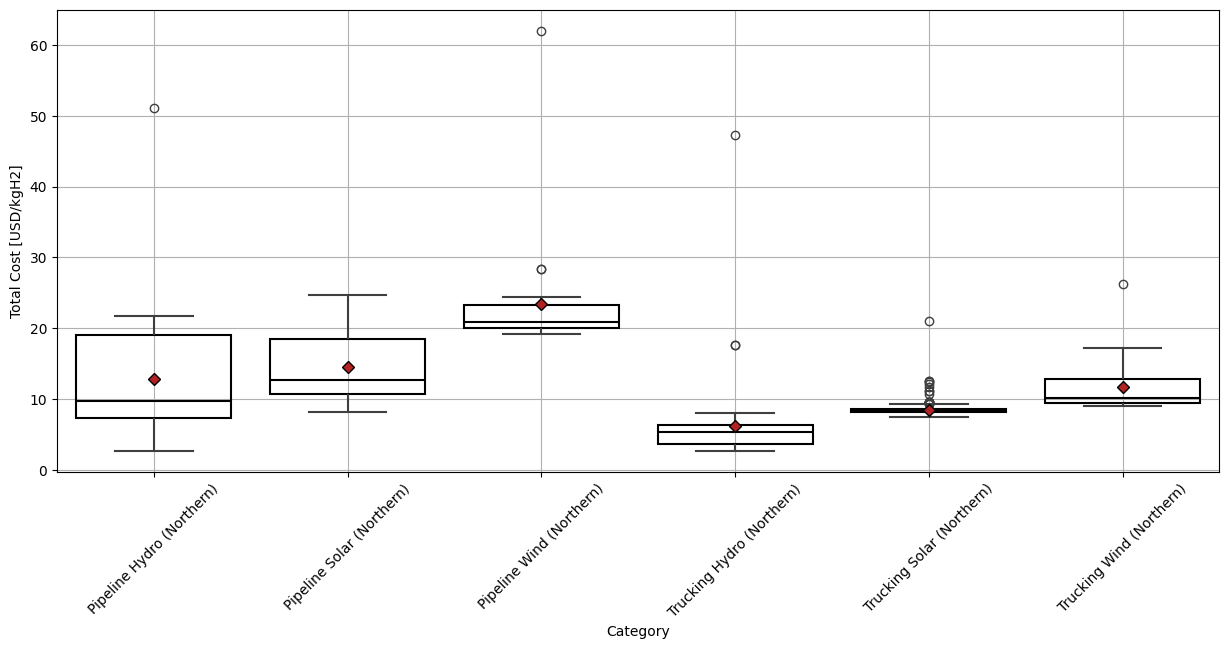

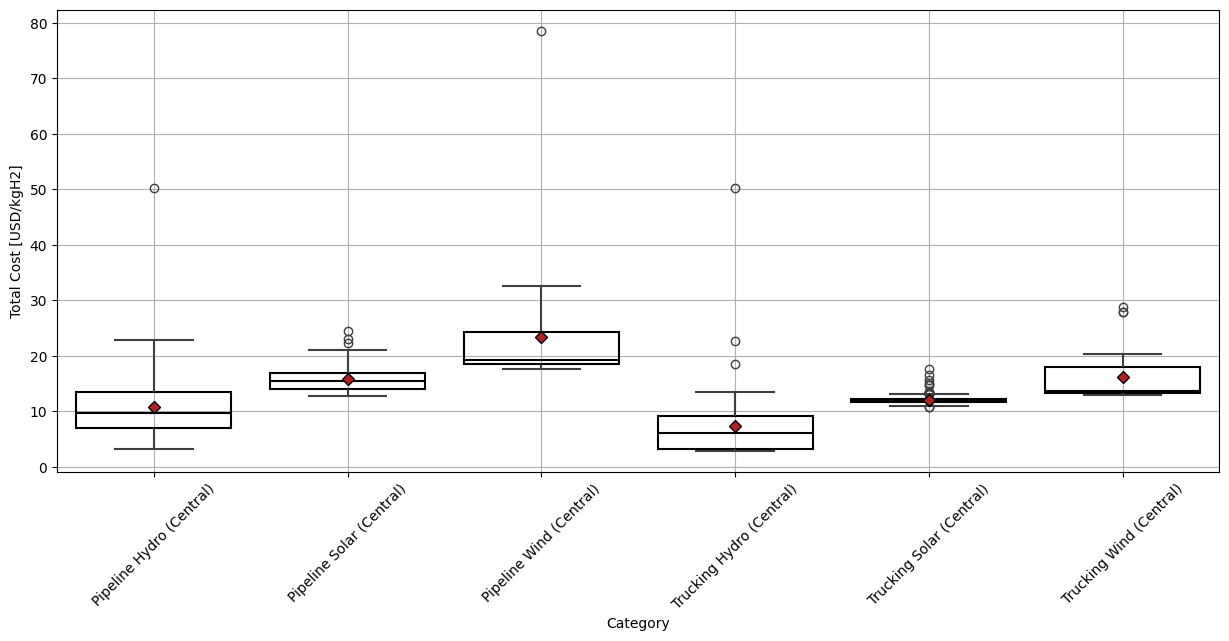

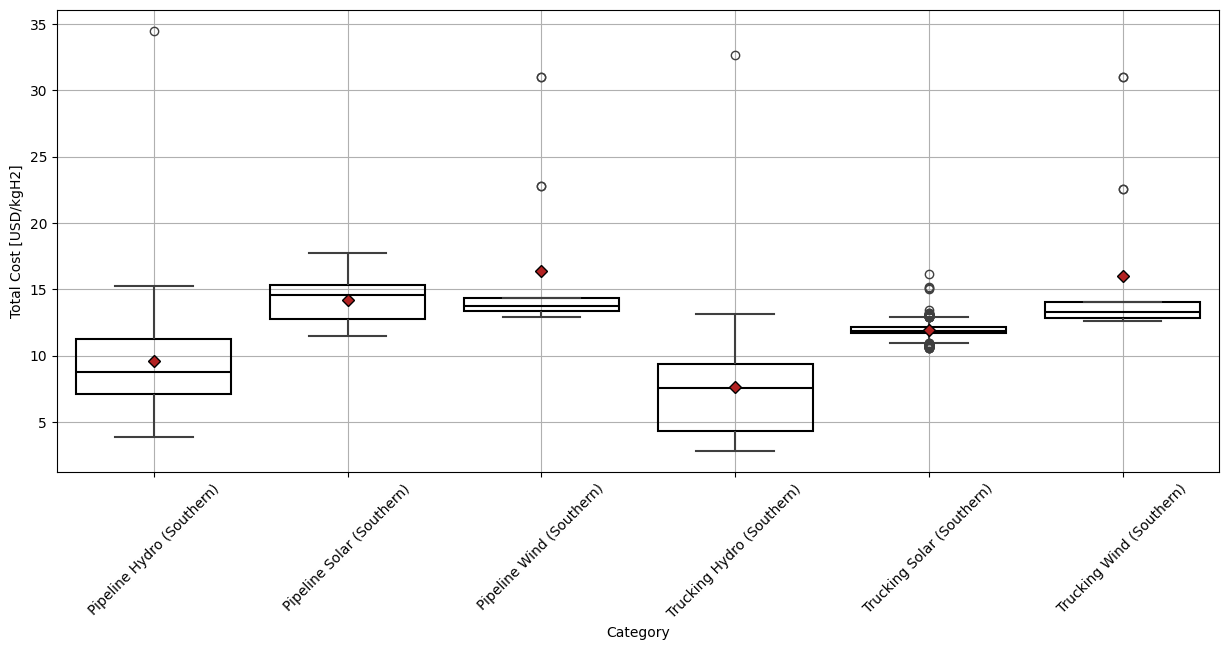

In [20]:
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
medianprops = dict(linestyle='-', color='black')
# Define a dictionary to store the region-specific DataFrames
region_cost_data = {
    'Northern': pd.concat([pipeline_hydro_northern_cost, pipeline_solar_northern_cost, pipeline_wind_northern_cost,
                           trucking_hydro_northern_cost, trucking_solar_northern_cost, trucking_wind_northern_cost]),
    
    'Central': pd.concat([pipeline_hydro_central_cost, pipeline_solar_central_cost, pipeline_wind_central_cost,
                          trucking_hydro_central_cost, trucking_solar_central_cost, trucking_wind_central_cost]),
    
    'Southern': pd.concat([pipeline_hydro_southern_cost, pipeline_solar_southern_cost, pipeline_wind_southern_cost,
                           trucking_hydro_southern_cost, trucking_solar_southern_cost, trucking_wind_southern_cost])
}

# Loop through each region and create individual plots
for region, cost_data in region_cost_data.items():
    plt.figure(figsize=(15, 6))

    # Create the boxplot for each region
    sns.boxplot(x='Category', y='Total Cost', data=cost_data, 
                showmeans=True, meanprops=meanpointprops, medianprops=medianprops,
                linewidth=1.5,  # Thinner box edges
                boxprops=dict(facecolor='none', edgecolor='black'))  # No fill, only black edges

    # Rename the y-axis
    plt.ylabel('Total Cost [USD/kgH2]')
    
    # Adjust x-axis label
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    # plt.title(f'Total Cost Distribution by Category ({region})')
    plt.grid(True)

    # Save the plot for each region
    plt.savefig(f'ratio_total/visualisation/total_cost_distribution_by_category_{region}.png', bbox_inches='tight')

    # Show the plot for each region
    plt.show()


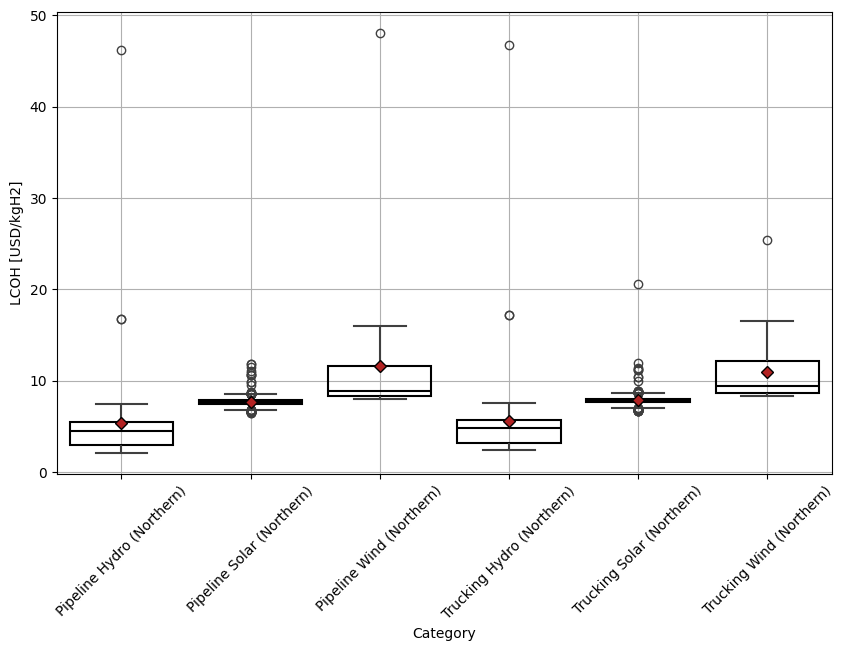

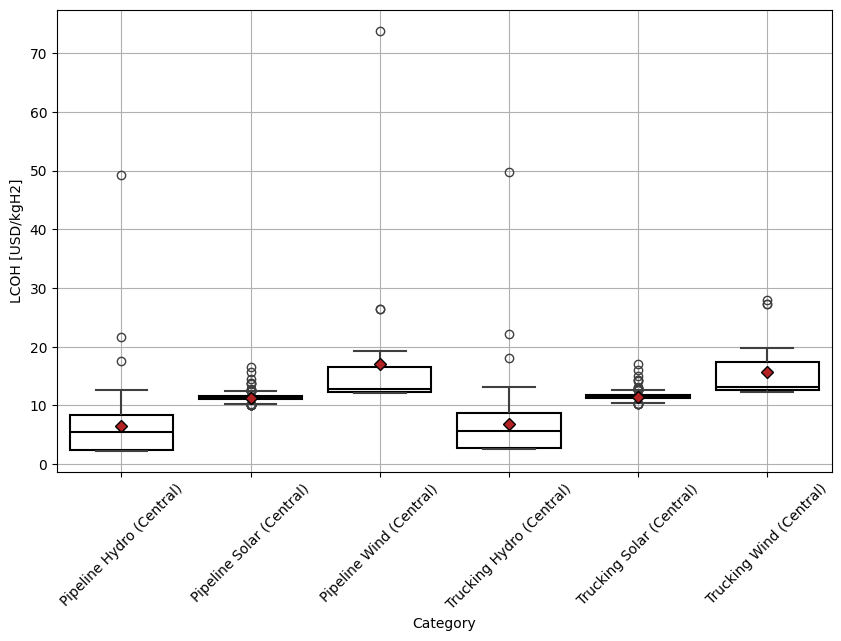

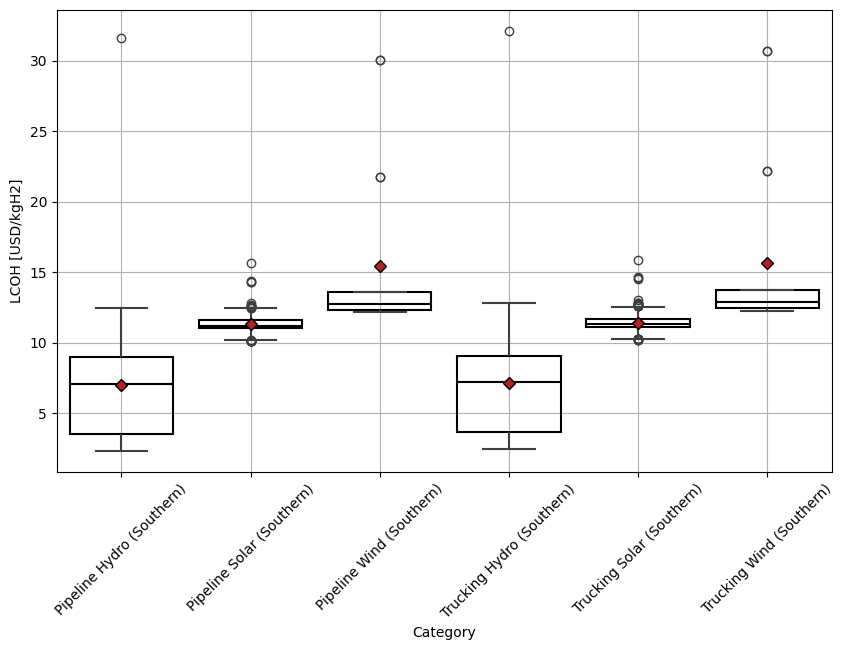

In [39]:
# Extract and rename production cost (LCOH) columns for Northern, Central, and Southern regions

# Northern Region
pipeline_hydro_northern_cost = gdf_pipeline_northern_hydro[['Northern pipeline production cost']].copy()
pipeline_hydro_northern_cost.rename(columns={'Northern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_hydro_northern_cost['Category'] = 'Pipeline Hydro (Northern)'

pipeline_solar_northern_cost = gdf_pipeline_northern_solar[['Northern pipeline production cost']].copy()
pipeline_solar_northern_cost.rename(columns={'Northern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_solar_northern_cost['Category'] = 'Pipeline Solar (Northern)'

pipeline_wind_northern_cost = gdf_pipeline_northern_wind[['Northern pipeline production cost']].copy()
pipeline_wind_northern_cost.rename(columns={'Northern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_wind_northern_cost['Category'] = 'Pipeline Wind (Northern)'

trucking_hydro_northern_cost = gdf_trucking_northern_hydro[['Northern trucking production cost']].copy()
trucking_hydro_northern_cost.rename(columns={'Northern trucking production cost': 'LCOH'}, inplace=True)
trucking_hydro_northern_cost['Category'] = 'Trucking Hydro (Northern)'

trucking_solar_northern_cost = gdf_trucking_northern_solar[['Northern trucking production cost']].copy()
trucking_solar_northern_cost.rename(columns={'Northern trucking production cost': 'LCOH'}, inplace=True)
trucking_solar_northern_cost['Category'] = 'Trucking Solar (Northern)'

trucking_wind_northern_cost = gdf_trucking_northern_wind[['Northern trucking production cost']].copy()
trucking_wind_northern_cost.rename(columns={'Northern trucking production cost': 'LCOH'}, inplace=True)
trucking_wind_northern_cost['Category'] = 'Trucking Wind (Northern)'

# Repeat for Central Region
pipeline_hydro_central_cost = gdf_pipeline_central_hydro[['Central pipeline production cost']].copy()
pipeline_hydro_central_cost.rename(columns={'Central pipeline production cost': 'LCOH'}, inplace=True)
pipeline_hydro_central_cost['Category'] = 'Pipeline Hydro (Central)'

pipeline_solar_central_cost = gdf_pipeline_central_solar[['Central pipeline production cost']].copy()
pipeline_solar_central_cost.rename(columns={'Central pipeline production cost': 'LCOH'}, inplace=True)
pipeline_solar_central_cost['Category'] = 'Pipeline Solar (Central)'

pipeline_wind_central_cost = gdf_pipeline_central_wind[['Central pipeline production cost']].copy()
pipeline_wind_central_cost.rename(columns={'Central pipeline production cost': 'LCOH'}, inplace=True)
pipeline_wind_central_cost['Category'] = 'Pipeline Wind (Central)'

trucking_hydro_central_cost = gdf_trucking_central_hydro[['Central trucking production cost']].copy()
trucking_hydro_central_cost.rename(columns={'Central trucking production cost': 'LCOH'}, inplace=True)
trucking_hydro_central_cost['Category'] = 'Trucking Hydro (Central)'

trucking_solar_central_cost = gdf_trucking_central_solar[['Central trucking production cost']].copy()
trucking_solar_central_cost.rename(columns={'Central trucking production cost': 'LCOH'}, inplace=True)
trucking_solar_central_cost['Category'] = 'Trucking Solar (Central)'

trucking_wind_central_cost = gdf_trucking_central_wind[['Central trucking production cost']].copy()
trucking_wind_central_cost.rename(columns={'Central trucking production cost': 'LCOH'}, inplace=True)
trucking_wind_central_cost['Category'] = 'Trucking Wind (Central)'

# Repeat for Southern Region
pipeline_hydro_southern_cost = gdf_pipeline_southern_hydro[['Southern pipeline production cost']].copy()
pipeline_hydro_southern_cost.rename(columns={'Southern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_hydro_southern_cost['Category'] = 'Pipeline Hydro (Southern)'

pipeline_solar_southern_cost = gdf_pipeline_southern_solar[['Southern pipeline production cost']].copy()
pipeline_solar_southern_cost.rename(columns={'Southern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_solar_southern_cost['Category'] = 'Pipeline Solar (Southern)'

pipeline_wind_southern_cost = gdf_pipeline_southern_wind[['Southern pipeline production cost']].copy()
pipeline_wind_southern_cost.rename(columns={'Southern pipeline production cost': 'LCOH'}, inplace=True)
pipeline_wind_southern_cost['Category'] = 'Pipeline Wind (Southern)'

trucking_hydro_southern_cost = gdf_trucking_southern_hydro[['Southern trucking production cost']].copy()
trucking_hydro_southern_cost.rename(columns={'Southern trucking production cost': 'LCOH'}, inplace=True)
trucking_hydro_southern_cost['Category'] = 'Trucking Hydro (Southern)'

trucking_solar_southern_cost = gdf_trucking_southern_solar[['Southern trucking production cost']].copy()
trucking_solar_southern_cost.rename(columns={'Southern trucking production cost': 'LCOH'}, inplace=True)
trucking_solar_southern_cost['Category'] = 'Trucking Solar (Southern)'

trucking_wind_southern_cost = gdf_trucking_southern_wind[['Southern trucking production cost']].copy()
trucking_wind_southern_cost.rename(columns={'Southern trucking production cost': 'LCOH'}, inplace=True)
trucking_wind_southern_cost['Category'] = 'Trucking Wind (Southern)'

# Define a dictionary to store the region-specific DataFrames
region_cost_data = {
    'Northern': pd.concat([pipeline_hydro_northern_cost, pipeline_solar_northern_cost, pipeline_wind_northern_cost,
                           trucking_hydro_northern_cost, trucking_solar_northern_cost, trucking_wind_northern_cost]),
    
    'Central': pd.concat([pipeline_hydro_central_cost, pipeline_solar_central_cost, pipeline_wind_central_cost,
                          trucking_hydro_central_cost, trucking_solar_central_cost, trucking_wind_central_cost]),
    
    'Southern': pd.concat([pipeline_hydro_southern_cost, pipeline_solar_southern_cost, pipeline_wind_southern_cost,
                           trucking_hydro_southern_cost, trucking_solar_southern_cost, trucking_wind_southern_cost])
}

# Loop through each region and create individual plots for LCOH
for region, cost_data in region_cost_data.items():
    plt.figure(figsize=(10, 6))

    # Create the boxplot for each region
    sns.boxplot(x='Category', y='LCOH', data=cost_data, 
                showmeans=True, meanprops=meanpointprops, medianprops=medianprops,
                linewidth=1.5,  # Thinner box edges
                boxprops=dict(facecolor='none', edgecolor='black'))  # No fill, only black edges

    # Rename the y-axis
    plt.ylabel('LCOH [USD/kgH2]')
    
    # Adjust x-axis label
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    # plt.title(f'LCOH Distribution by Category ({region})')
    plt.grid(True)

    # Save the plot for each region
    plt.savefig(f'ratio_total/visualisation/LCOH_distribution_by_category_{region}.png', bbox_inches='tight')

    # Show the plot for each region
    plt.show()


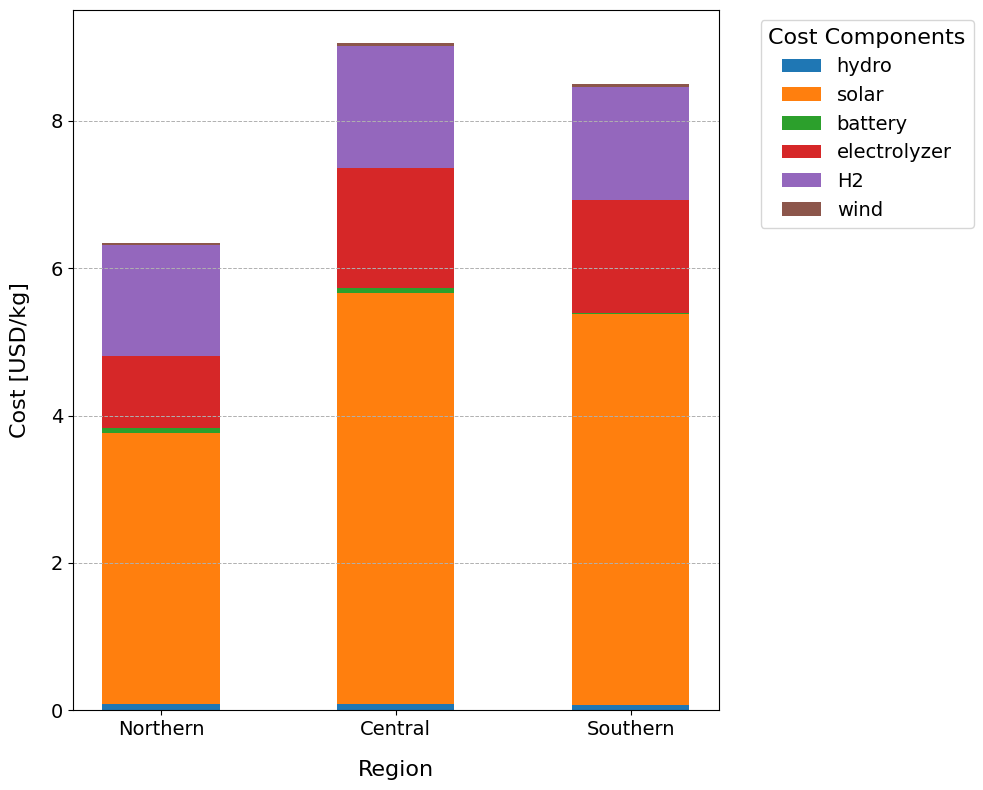

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Define the cost components to analyze for each region
cost_components = [
    'pipeline hydro portion',
    'pipeline solar portion',
    'pipeline battery costs portion',
    'pipeline electrolyzer portion',
    'pipeline H2 storage portion',
    'pipeline wind portion'
]

# Calculate the average cost for each component by region
average_costs = {component: [] for component in cost_components}

for component in cost_components:
    average_costs[component].append(gdf_Northern[f'Northern LCOH - {component}'].mean())
    average_costs[component].append(gdf_Central[f'Central LCOH - {component}'].mean())
    average_costs[component].append(gdf_Southern[f'Southern LCOH - {component}'].mean())

# Convert the data into a NumPy array for easier plotting
components_array = np.array([average_costs[component] for component in cost_components])

# Define the regions
regions = ['Northern', 'Central', 'Southern']
bar_width = 0.5  # Width of the bars

# Create the figure and axis for the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the stacked bars
bottoms = np.zeros(len(regions))  # Initialize the bottoms array for stacking

for i, component in enumerate(cost_components):
    ax.bar(regions, components_array[i], bottom=bottoms, label=component.split(" ")[1], width=bar_width)
    bottoms += components_array[i]  # Update bottoms for the next component

# Add labels and title
plt.xlabel('Region', fontsize=16, labelpad=15)
plt.ylabel('Cost [USD/kg]', fontsize=16, labelpad=15)

# Increase tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Move the legend outside the plot and increase font size
plt.legend(title="Cost Components", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Set grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Save the plot with tighter layout and increased resolution
plt.tight_layout()
plt.savefig(f'ratio_total/visualisation/average_cost_components_by_region_stacked_bar.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


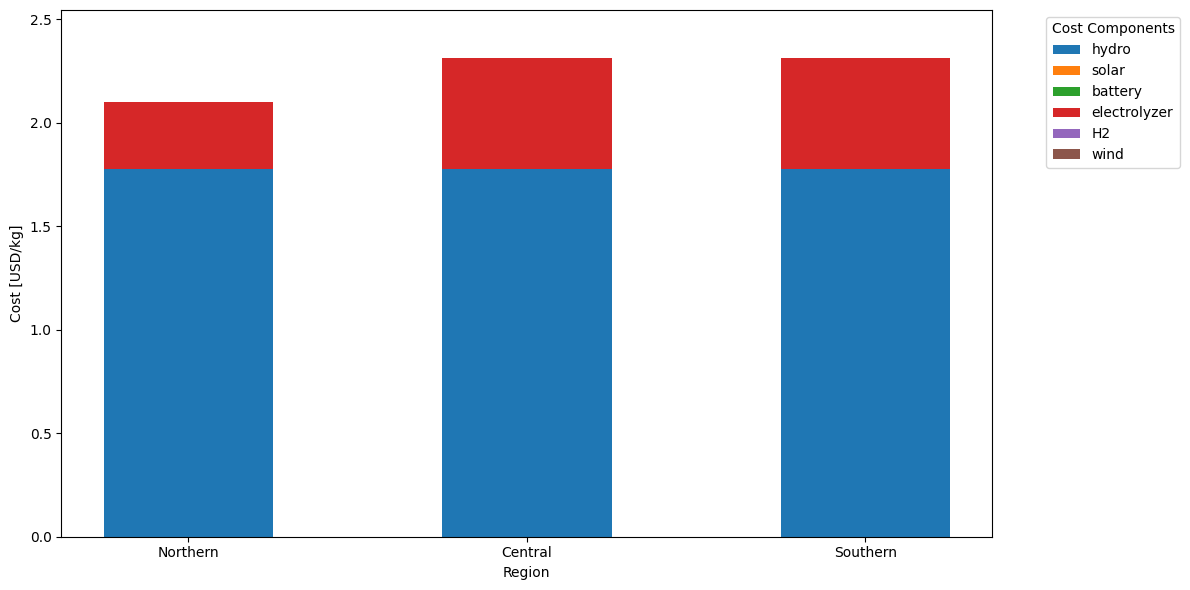

In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Define the cost components to analyze for each region
cost_components = [
    'pipeline hydro portion',
    'pipeline solar portion',
    'pipeline battery costs portion',
    'pipeline electrolyzer portion',
    'pipeline H2 storage portion',
    'pipeline wind portion'
]

# Extract the hexagon with the minimum total cost for each region
min_hex_Northern = gdf_Northern.loc[gdf_Northern['Northern pipeline total cost'].idxmin()]
min_hex_Central = gdf_Central.loc[gdf_Central['Central pipeline total cost'].idxmin()]
min_hex_Southern = gdf_Southern.loc[gdf_Southern['Southern pipeline total cost'].idxmin()]

# Initialize a dictionary to store the costs for the minimum hexagon in each region
min_total_costs = {component: [] for component in cost_components}

# Append the minimum total cost hexagon's component costs for each region
for component in cost_components:
    min_total_costs[component].append(min_hex_Northern[f'Northern LCOH - {component}'])
    min_total_costs[component].append(min_hex_Central[f'Central LCOH - {component}'])
    min_total_costs[component].append(min_hex_Southern[f'Southern LCOH - {component}'])

# Convert the data into a NumPy array for easier plotting
components_array = np.array([min_total_costs[component] for component in cost_components])

# Define the regions
regions = ['Northern', 'Central', 'Southern']
bar_width = 0.5  # Width of the bars

# Create the figure and axis for the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bars
bottoms = np.zeros(len(regions))  # Initialize the bottoms array for stacking

for i, component in enumerate(cost_components):
    ax.bar(regions, components_array[i], bottom=bottoms, label=component.split(" ")[1], width=bar_width)
    bottoms += components_array[i]  # Update bottoms for the next component

# Set y-axis limit to avoid cutting off bars
plt.ylim(0, np.max(bottoms) * 1.1)  # Add 10% buffer above the highest bar

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Cost [USD/kg]')
# plt.title('Cost Components for Minimum Total Cost Hexagon by Region')

# Move the legend outside the plot
plt.legend(title="Cost Components", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.tight_layout()
plt.savefig(f'ratio_total/visualisation/Min_Total_Cost_components_by_region_stacked_bar.png', bbox_inches='tight')

# Show the plot
plt.show()


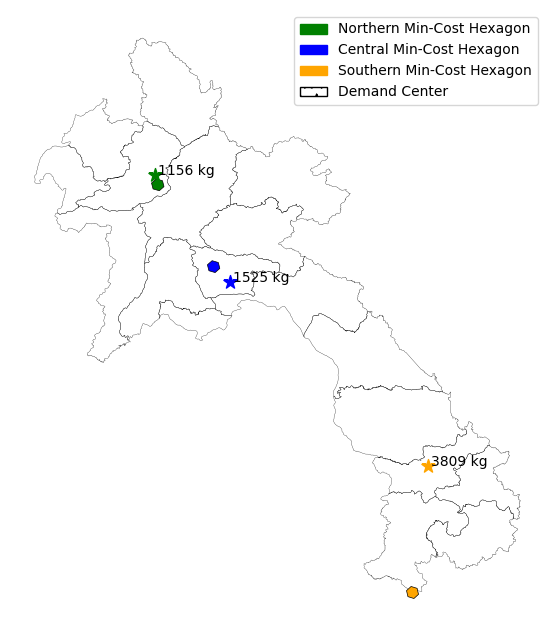

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
from matplotlib.patches import Patch

def plot_min_cost_hexagons_for_regions(hexagons, provinces, demand_centers, save_path):
    """
    Plots the min-cost hexagons for different regions, province borders, and the demand centers.
    
    Parameters:
    - hexagons: A dictionary with regions as keys and GeoSeries of min-cost hexagons as values.
    - provinces: GeoDataFrame for province boundaries.
    - demand_centers: A dictionary with regions as keys and their respective (latitude, longitude, demand) tuples.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Define colors for each region
    colors = {
        'Northern': 'green',
        'Central': 'blue',
        'Southern': 'orange'
    }

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.2)

    # Plot each region's hexagon with a different color and line connecting to the demand center
    for region, hexagon in hexagons.items():
        hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)
        
        # Plot the hexagon
        hexagon_geo.to_crs(crs.proj4_init).plot(
            ax=ax, color=colors[region], edgecolor='black', linewidth=0.5)

        # Plot the demand center for the region with black borders for the star
        demand_lat, demand_lon, demand_kg = demand_centers[region]
        demand_center = gpd.GeoSeries([Point(demand_lon, demand_lat)], crs=geo_crs)
        demand_center.to_crs(crs.proj4_init).plot(
                    ax=ax, color=colors[region], marker='*', markersize=100, label=f'{region} Demand Center')
        # Add black text to show the demand amount next to the demand center
        plt.text(demand_lon + 0.05, demand_lat, f'{demand_kg} kg', fontsize=10, color='black')

    # Create custom legend with hollow black star for the demand center
    legend_patches = [Patch(color=color, label=f'{region} Min-Cost Hexagon') for region, color in colors.items()]
    legend_patches.append(Patch(facecolor='none', edgecolor='black', label='Demand Center', hatch='*'))

    plt.legend(handles=legend_patches, loc='upper right')
    # plt.title("Min-Cost Hexagons and Demand Center Across Regions")
    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Find the min-cost hexagons for each region
min_hex_Northern = gdf_Northern.loc[gdf_Northern['Northern pipeline total cost'].idxmin()]
min_hex_Central = gdf_Central.loc[gdf_Central['Central pipeline total cost'].idxmin()]
min_hex_Southern = gdf_Southern.loc[gdf_Southern['Southern pipeline total cost'].idxmin()]

# Combine the hexagons into a dictionary
hexagons = {
    'Northern': min_hex_Northern,
    'Central': min_hex_Central,
    'Southern': min_hex_Southern
}

# Define the demand centers for each region (latitude, longitude, demand in kg)
demand_centers = {
    'Northern': (20.381290, 101.952300, 1156),
    'Central': (18.722583, 103.116514, 1525),
    'Southern': (15.853203, 106.197453, 3809)
}

# Example province boundaries GeoDataFrame (assuming already loaded)
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Plot and save
plot_min_cost_hexagons_for_regions(hexagons, provinces, demand_centers, 'min_cost_hexagons_by_region.png')


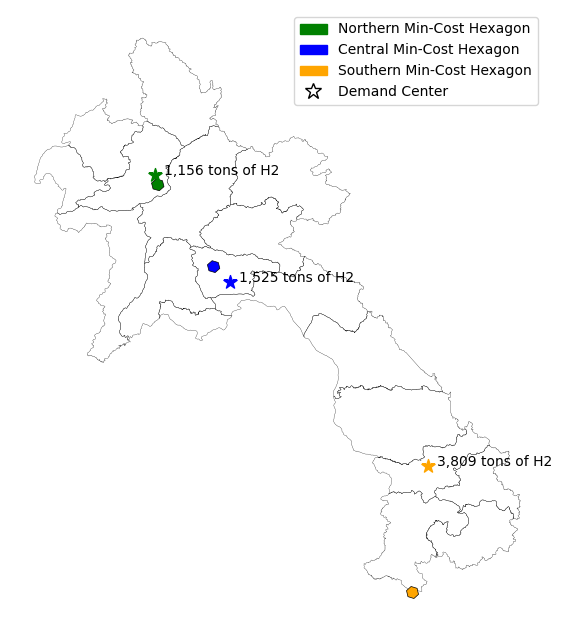

In [110]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D  # Import Line2D for the star in the legend

def plot_min_cost_hexagons_for_regions(hexagons, provinces, demand_centers, save_path):
    """
    Plots the min-cost hexagons for different regions, province borders, and the demand centers.
    
    Parameters:
    - hexagons: A dictionary with regions as keys and GeoSeries of min-cost hexagons as values.
    - provinces: GeoDataFrame for province boundaries.
    - demand_centers: A dictionary with regions as keys and their respective (latitude, longitude, demand) tuples.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Define colors for each region
    colors = {
        'Northern': 'green',
        'Central': 'blue',
        'Southern': 'orange'
    }

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.2)

    # Plot each region's hexagon with a different color and line connecting to the demand center
    for region, hexagon in hexagons.items():
        hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)
        
        # Plot the hexagon
        hexagon_geo.to_crs(crs.proj4_init).plot(
            ax=ax, color=colors[region], edgecolor='black', linewidth=0.5)

        # Plot the demand center for the region with black borders for the star
        demand_lat, demand_lon, demand_kg = demand_centers[region]
        demand_center = gpd.GeoSeries([Point(demand_lon, demand_lat)], crs=geo_crs)
        demand_center.to_crs(crs.proj4_init).plot(
                    ax=ax, color=colors[region], marker='*', markersize=100, label=f'{region} Demand Center')

        # Add black text to show the demand amount next to the demand center
        plt.text(demand_lon + 0.15, demand_lat, f'{demand_kg} tons of H2', fontsize=10, color='black')

    # Create custom legend with a black star for the demand center
    legend_patches = [Patch(color=color, label=f'{region} Min-Cost Hexagon') for region, color in colors.items()]
    
    # Add black star to legend using Line2D
    star_legend = Line2D([0], [0], color='none', marker='*', markeredgecolor='black', markeredgewidth=1, linestyle='None', markersize=12, label='Demand Center')

    
    # Add the star legend to the list of legend handles
    plt.legend(handles=legend_patches + [star_legend], loc='upper right')

    # plt.title("Min-Cost Hexagons and Demand Center Across Regions")
    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Find the min-cost hexagons for each region
min_hex_Northern = gdf_Northern.loc[gdf_Northern['Northern trucking total cost'].idxmin()]
min_hex_Central = gdf_Central.loc[gdf_Central['Central trucking total cost'].idxmin()]
min_hex_Southern = gdf_Southern.loc[gdf_Southern['Southern trucking total cost'].idxmin()]

# Combine the hexagons into a dictionary
hexagons = {
    'Northern': min_hex_Northern,
    'Central': min_hex_Central,
    'Southern': min_hex_Southern
}

# Define the demand centers for each region (latitude, longitude, demand in kg)
demand_centers = {
    'Northern': (20.381290, 101.952300, '1,156'),
    'Central': (18.722583, 103.116514, '1,525'),
    'Southern': (15.853203, 106.197453, '3,809')
}

# Example province boundaries GeoDataFrame (assuming already loaded)
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Plot and save
plot_min_cost_hexagons_for_regions(hexagons, provinces, demand_centers, 'ratio_total/visualisation/min_cost_hexagons_by_region_trucking.png')


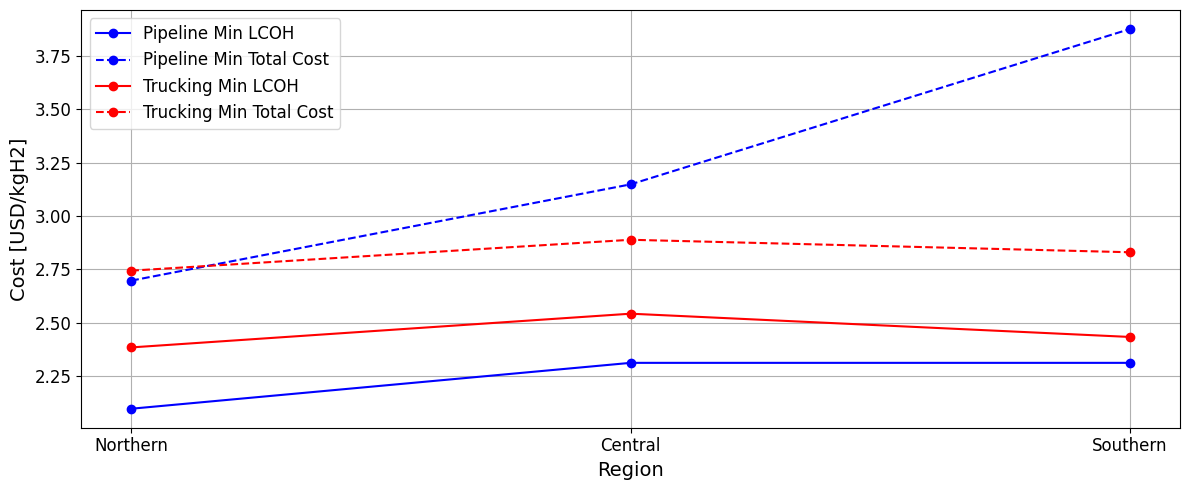

In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Define the regions
regions = ['Northern', 'Central', 'Southern']
gdfs = [gdf_Northern, gdf_Central, gdf_Southern]

# Initialize dictionaries to store minimum costs for each region
pipeline_min_costs = {'Min LCOH': [], 'Min Total Cost': []}
trucking_min_costs = {'Min LCOH': [], 'Min Total Cost': []}

# Extract minimum costs for each region from the GeoDataFrames
for i, gdf in enumerate(gdfs):
    region = regions[i]
    
    # Pipeline costs
    pipeline_min_costs['Min LCOH'].append(gdf[f'{region} pipeline production cost'].min())
    pipeline_min_costs['Min Total Cost'].append(gdf[f'{region} pipeline total cost'].min())
    
    # Trucking costs
    trucking_min_costs['Min LCOH'].append(gdf[f'{region} trucking production cost'].min())
    trucking_min_costs['Min Total Cost'].append(gdf[f'{region} trucking total cost'].min())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the minimum costs for pipeline and trucking
ax.plot(regions, pipeline_min_costs['Min LCOH'], marker='o', linestyle='-', color='blue', label='Pipeline Min LCOH')
ax.plot(regions, pipeline_min_costs['Min Total Cost'], marker='o', linestyle='--', color='blue', label='Pipeline Min Total Cost')
ax.plot(regions, trucking_min_costs['Min LCOH'], marker='o', linestyle='-', color='red', label='Trucking Min LCOH')
ax.plot(regions, trucking_min_costs['Min Total Cost'], marker='o', linestyle='--', color='red', label='Trucking Min Total Cost')

# Add labels, title, and grid
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Cost [USD/kgH2]', fontsize=14)
ax.grid(True)
# ax.set_title('Comparison of Minimum LCOH and Total Costs: Pipeline vs Trucking (by Region)', fontsize=16)

# Customize the tick labels and font sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(loc='best', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot

plt.savefig(f'ratio_total/visualisation/comparison_minimum_lcoh_total_cost.png', bbox_inches='tight')

plt.show()


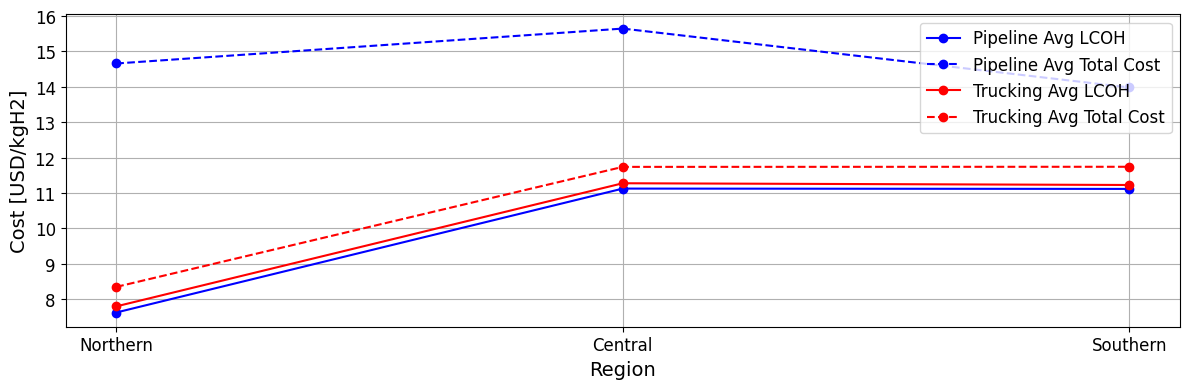

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Define the regions
regions = ['Northern', 'Central', 'Southern']
gdfs = [gdf_Northern, gdf_Central, gdf_Southern]

# Initialize dictionaries to store average costs for each region
pipeline_avg_costs = {'Avg LCOH': [], 'Avg Total Cost': []}
trucking_avg_costs = {'Avg LCOH': [], 'Avg Total Cost': []}

# Extract average costs for each region from the GeoDataFrames
for i, gdf in enumerate(gdfs):
    region = regions[i]
    
    # Pipeline costs
    pipeline_avg_costs['Avg LCOH'].append(gdf[f'{region} pipeline production cost'].mean())
    pipeline_avg_costs['Avg Total Cost'].append(gdf[f'{region} pipeline total cost'].mean())
    
    # Trucking costs
    trucking_avg_costs['Avg LCOH'].append(gdf[f'{region} trucking production cost'].mean())
    trucking_avg_costs['Avg Total Cost'].append(gdf[f'{region} trucking total cost'].mean())

# Create the figure and axes for average costs
fig, ax = plt.subplots(figsize=(12, 4))

# Plotting the average costs for pipeline and trucking
ax.plot(regions, pipeline_avg_costs['Avg LCOH'], marker='o', linestyle='-', color='blue', label='Pipeline Avg LCOH')
ax.plot(regions, pipeline_avg_costs['Avg Total Cost'], marker='o', linestyle='--', color='blue', label='Pipeline Avg Total Cost')
ax.plot(regions, trucking_avg_costs['Avg LCOH'], marker='o', linestyle='-', color='red', label='Trucking Avg LCOH')
ax.plot(regions, trucking_avg_costs['Avg Total Cost'], marker='o', linestyle='--', color='red', label='Trucking Avg Total Cost')

# Add labels, title, and grid
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Cost [USD/kgH2]', fontsize=14)
ax.grid(True)

# Add legend
ax.legend(loc='upper right', fontsize=12)

# Customize the tick labels and font sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig(f'ratio_total/visualisation/comparison_average_lcoh_total_cost.png', bbox_inches='tight')
# Display the plot
plt.show()


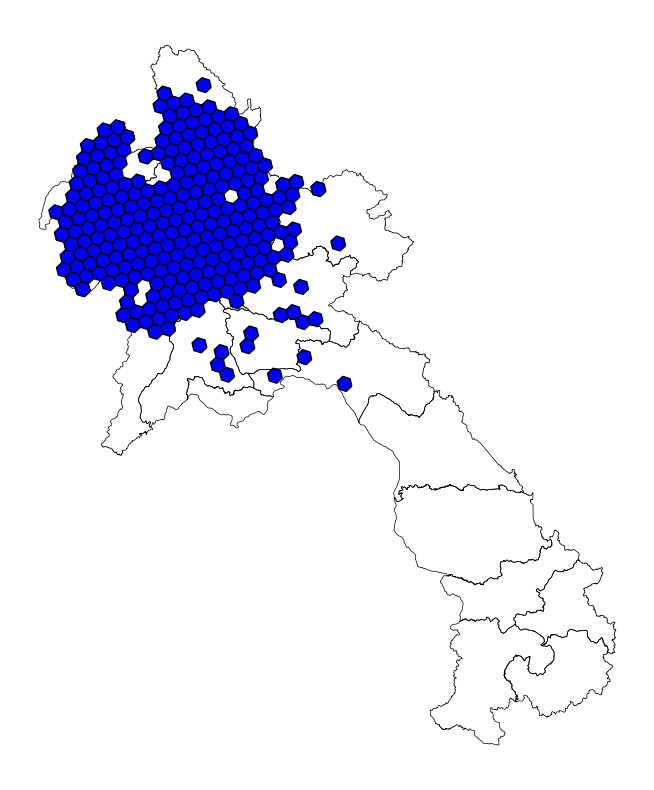

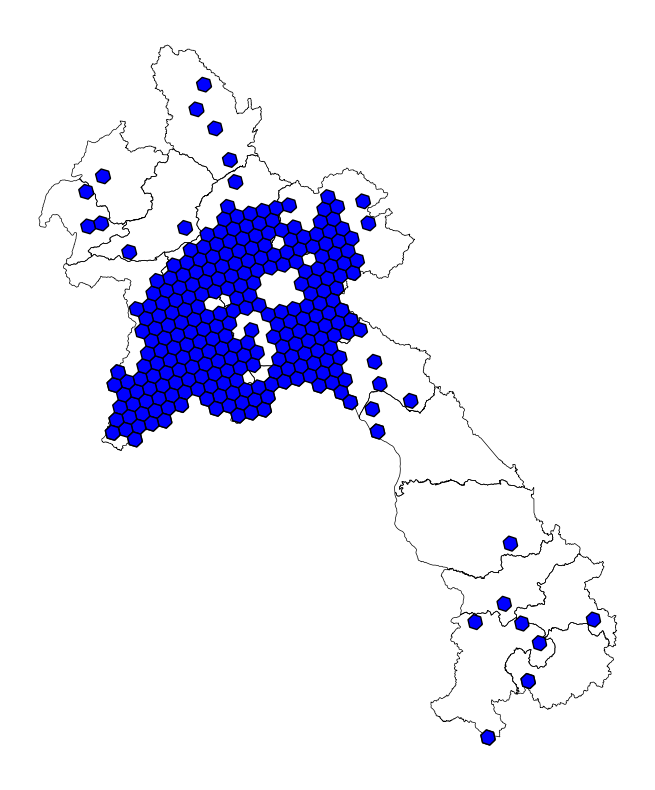

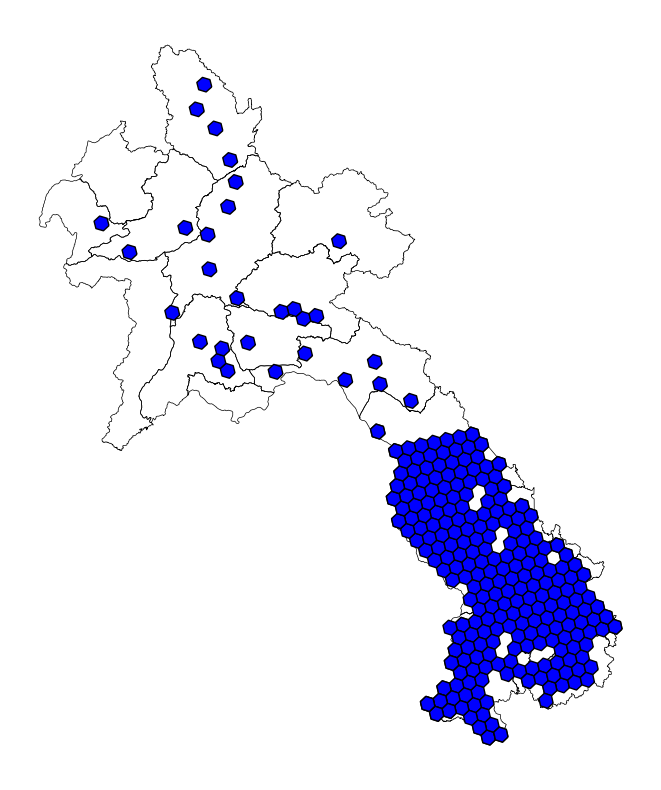

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Get the top 300 hexagons by trucking total cost for each region
x = 300

top_300_Northern = gdf_Northern.nsmallest(x, 'Northern pipeline total cost')
top_300_Central = gdf_Central.nsmallest(x, 'Central pipeline total cost')
top_300_Southern = gdf_Southern.nsmallest(x, 'Southern pipeline total cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Combine all data into a dictionary for easy access
hexagons_per_region = {
    'Northern': top_300_Northern,
    'Central': top_300_Central,
    'Southern': top_300_Southern
}

# Loop through each region and create a plot
for region, hexagons in hexagons_per_region.items():
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the province boundaries
    provinces.to_crs(gdf_Northern.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Plot the top 300 hexagons for the current region
    hexagons.plot(ax=ax, color='blue', edgecolor='black')
    
    # Set the title for the current region
    # ax.set_title(f'Top 300 Hexagons by Trucking Total Cost - {region}')
    ax.set_axis_off()

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'ratio_total/visualisation/top_300_hexagons_{region}_pipeline.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()


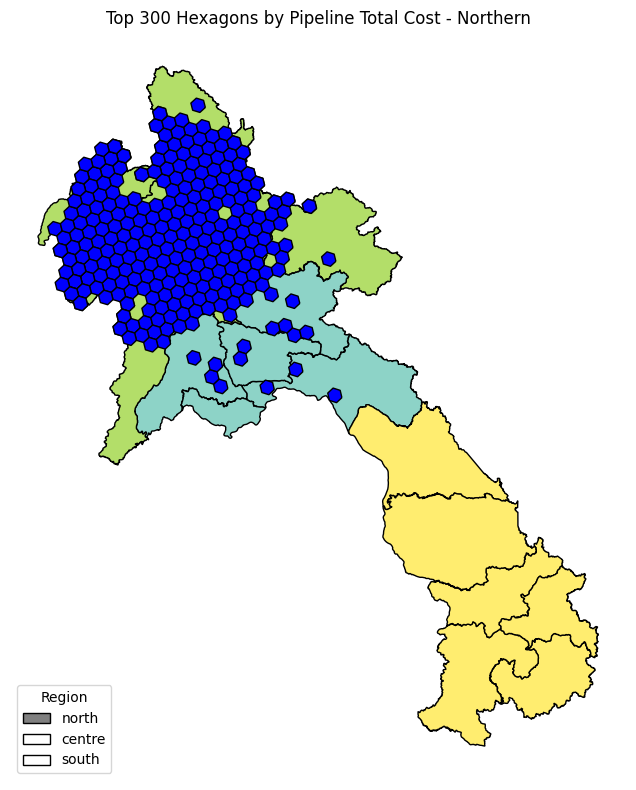

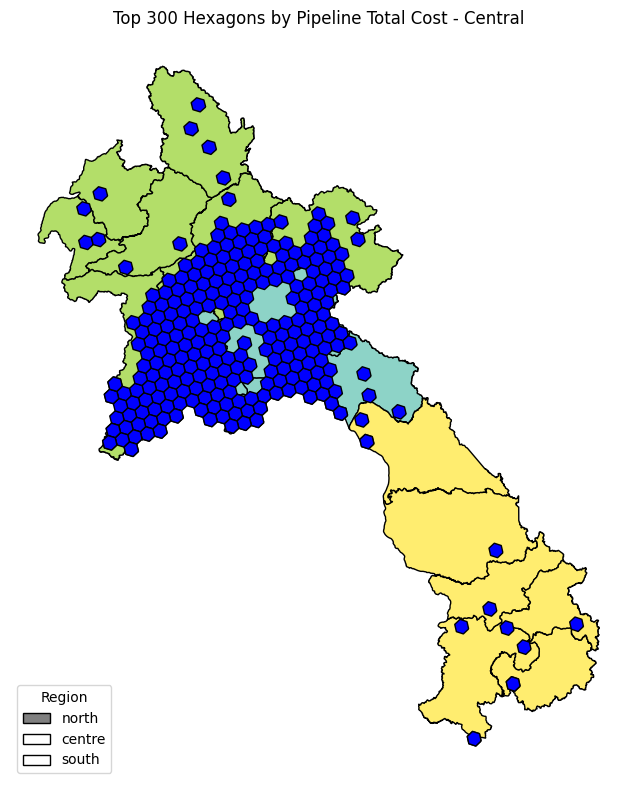

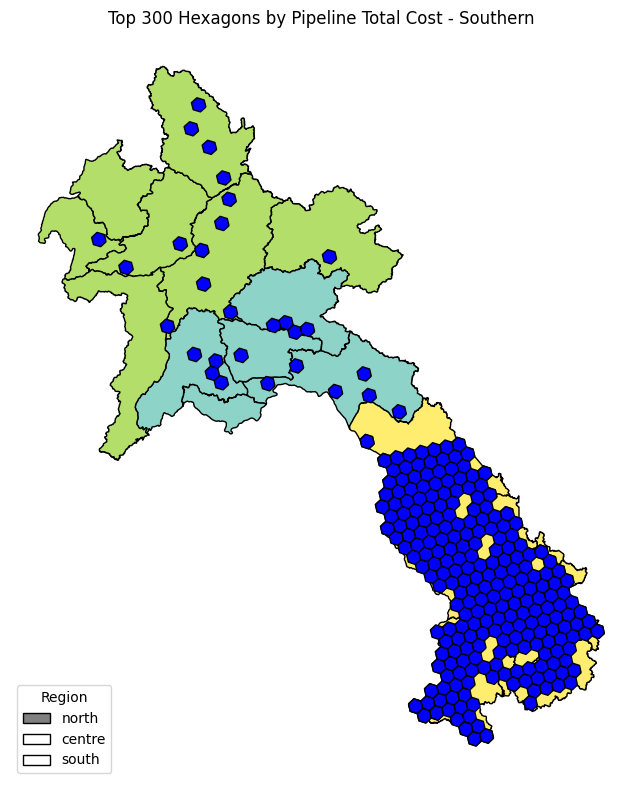

In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Get the top 300 hexagons by pipeline total cost for each region
x = 300
top_300_Northern = gdf_Northern.nsmallest(x, 'Northern pipeline total cost')
top_300_Central = gdf_Central.nsmallest(x, 'Central pipeline total cost')
top_300_Southern = gdf_Southern.nsmallest(x, 'Southern pipeline total cost')

# Path to your provinces GeoJSON file
geojson_path = r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson'

# Load the provinces GeoDataFrame
gdf_provinces = gpd.read_file(geojson_path)

# Create a DataFrame with the area information
area_data = {
    'Province_old': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasak', 'Houaphanh', 
                     'Khammouane', 'Luang Namtha', 'Luang Prabang', 'Oudomxay', 
                     'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane', 
                     'Vientiane prefecture', 'Sainyabuli', 'Xaisomboun', 
                     'Sekong', 'Xiangkhouang'],
    'Province': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasack', 'Houaphan',
                 'Khammouan', 'Louangnamtha', 'Louangphabang', 'Oudomxai',
                 'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane',
                 'Vientiane Capital', 'Xaignabouly', 'Xaisomboon',
                 'Sekong', 'Xiengkhouang'],
    'Area_new24': ['south', 'north', 'centre', 'south', 'north', 'south', 
                   'north', 'north', 'north', 'north', 'south', 'south', 
                   'centre', 'centre', 'north', 'centre', 'south', 'centre']
}

# Convert to DataFrame
area_df = pd.DataFrame(area_data)

# Merge the provinces GeoDataFrame with the area DataFrame
gdf_provinces = gdf_provinces.merge(area_df, left_on='ADM1_EN', right_on='Province', how='left')

# Define colors for each area category
colors = {
    'north': 'grey',
    'centre': 'white',
    'south': 'white'
}

# Combine all data into a dictionary for easy access
hexagons_per_region = {
    'Northern': top_300_Northern,
    'Central': top_300_Central,
    'Southern': top_300_Southern
}

# Loop through each region and create a plot
for region, hexagons in hexagons_per_region.items():
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the provinces colored by area
    gdf_provinces.plot(column='Area_new24', ax=ax, edgecolor='black', legend=False,
                       cmap='Set3')

    # Plot the top 300 hexagons for the current region
    hexagons.plot(ax=ax, color='blue', edgecolor='black')

    # Add a legend for the area colors
    legend_patches = [Patch(facecolor=color, edgecolor='black', label=area) for area, color in colors.items()]
    plt.legend(handles=legend_patches, loc='lower left', title='Region')

    # Set the title for the current region
    ax.set_title(f'Top 300 Hexagons by Pipeline Total Cost - {region}')
    ax.set_axis_off()

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'ratio_total/visualisation/top_300_hexagons_{region}_pipeline_with_area.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()


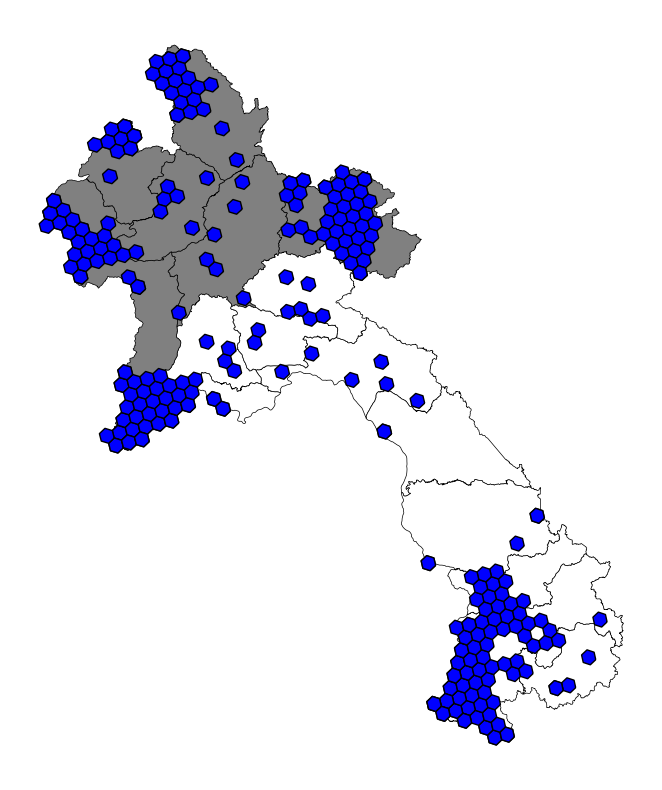

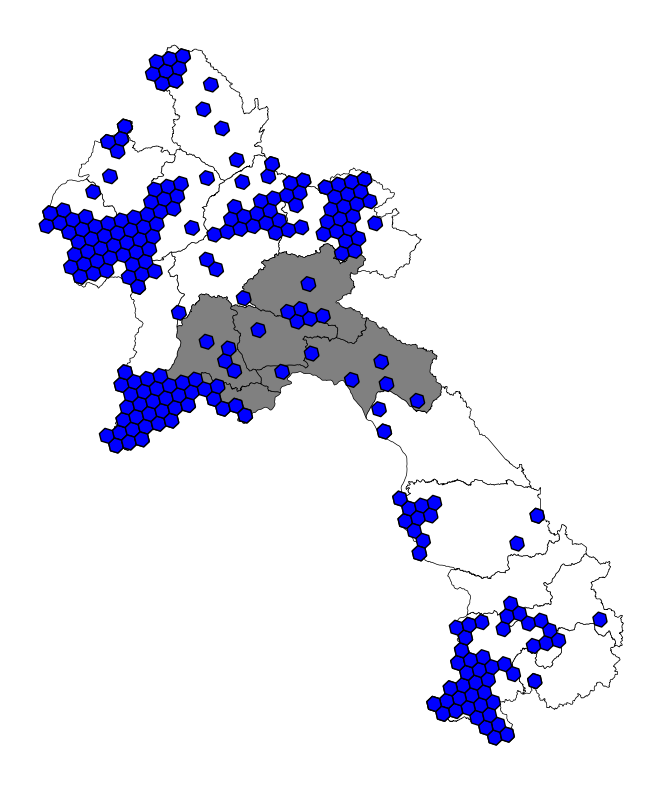

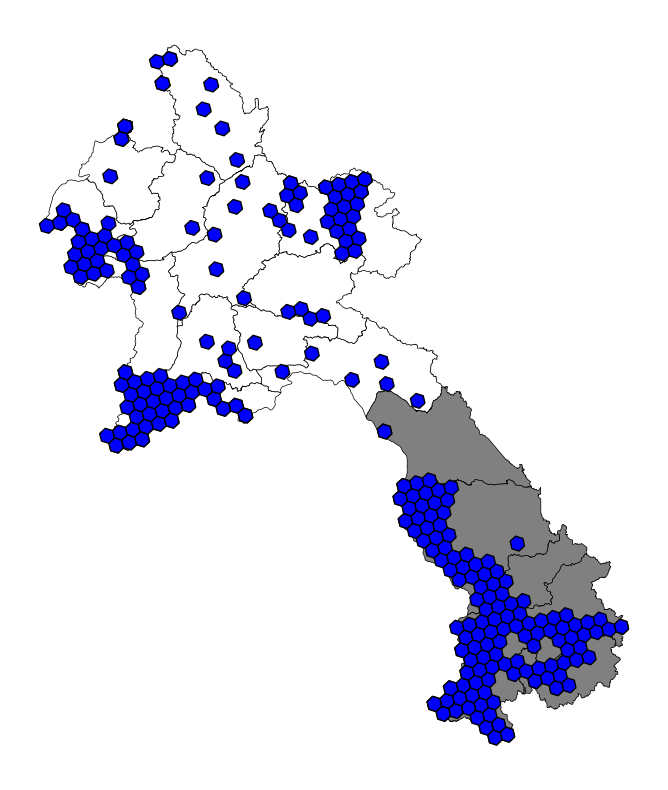

In [108]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Get the top 300 hexagons by pipeline total cost for each region
x = 300
top_300_Northern = gdf_Northern.nsmallest(x, 'Northern trucking total cost')
top_300_Central = gdf_Central.nsmallest(x, 'Central trucking total cost')
top_300_Southern = gdf_Southern.nsmallest(x, 'Southern trucking total cost')

# Path to your provinces GeoJSON file
geojson_path = r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson'

# Load the provinces GeoDataFrame
gdf_provinces = gpd.read_file(geojson_path)

# Create a DataFrame with the area information
area_data = {
    'Province_old': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasak', 'Houaphanh', 
                     'Khammouane', 'Luang Namtha', 'Luang Prabang', 'Oudomxay', 
                     'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane', 
                     'Vientiane prefecture', 'Sainyabuli', 'Xaisomboun', 
                     'Sekong', 'Xiangkhouang'],
    'Province': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasack', 'Houaphan',
                 'Khammouan', 'Louangnamtha', 'Louangphabang', 'Oudomxai',
                 'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane',
                 'Vientiane Capital', 'Xaignabouly', 'Xaisomboon',
                 'Sekong', 'Xiengkhouang'],
    'Area_new24': ['south', 'north', 'centre', 'south', 'north', 'south', 
                   'north', 'north', 'north', 'north', 'south', 'south', 
                   'centre', 'centre', 'north', 'centre', 'south', 'centre']
}

# Convert to DataFrame
area_df = pd.DataFrame(area_data)

# Merge the provinces GeoDataFrame with the area DataFrame
gdf_provinces = gdf_provinces.merge(area_df, left_on='ADM1_EN', right_on='Province', how='left')

def assign_region_color(row, region_name, highlight_color):
    if row['Area_new24'] == region_name.lower():
        return highlight_color
    else:
        return 'white'

# Define a function to plot an individual region
def plot_region(region, region_name, hexagons, highlight_color):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Apply the function to assign colors based on the region
    gdf_provinces['color'] = gdf_provinces.apply(assign_region_color, axis=1, region_name=region, highlight_color=highlight_color)

    # Plot the provinces, ensuring correct coloring
    gdf_provinces.plot(ax=ax, color=gdf_provinces['color'], edgecolor='black', linewidth=0.5)

    # Plot the top 300 hexagons for the current region
    hexagons.plot(ax=ax, color='blue', edgecolor='black')

    # Set the title for the current region
    # ax.set_title(f'Top 300 Hexagons by Pipeline Total Cost - {region_name}')
    ax.set_axis_off()

    # Add a custom legend
    legend_patches = [Patch(facecolor=highlight_color, edgecolor='black', label=f'{region_name} Region')]
    # plt.legend(handles=legend_patches, loc='lower left', title='Region')

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'ratio_total/visualisation/top_300_hexagons_{region_name}_trucking.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Plot each region individually
plot_region('north','Northern', top_300_Northern, 'grey')
plot_region('centre','Central', top_300_Central, 'grey')
plot_region('south','Southern', top_300_Southern, 'grey')


In [111]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import imageio

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Get the top 300 hexagons by pipeline and trucking total cost for each region
x = 300
top_300_Northern_pipeline = gdf_Northern.nsmallest(x, 'Northern pipeline total cost')
top_300_Central_pipeline = gdf_Central.nsmallest(x, 'Central pipeline total cost')
top_300_Southern_pipeline = gdf_Southern.nsmallest(x, 'Southern pipeline total cost')

top_300_Northern_trucking = gdf_Northern.nsmallest(x, 'Northern trucking total cost')
top_300_Central_trucking = gdf_Central.nsmallest(x, 'Central trucking total cost')
top_300_Southern_trucking = gdf_Southern.nsmallest(x, 'Southern trucking total cost')

# Path to your provinces GeoJSON file
geojson_path = r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson'

# Load the provinces GeoDataFrame
gdf_provinces = gpd.read_file(geojson_path)

# Create a DataFrame with the area information
area_data = {
    'Province_old': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasak', 'Houaphanh', 
                     'Khammouane', 'Luang Namtha', 'Luang Prabang', 'Oudomxay', 
                     'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane', 
                     'Vientiane prefecture', 'Sainyabuli', 'Xaisomboun', 
                     'Sekong', 'Xiangkhouang'],
    'Province': ['Attapeu', 'Bokeo', 'Bolikhamxai', 'Champasack', 'Houaphan',
                 'Khammouan', 'Louangnamtha', 'Louangphabang', 'Oudomxai',
                 'Phongsaly', 'Salavan', 'Savannakhet', 'Vientiane',
                 'Vientiane Capital', 'Xaignabouly', 'Xaisomboon',
                 'Sekong', 'Xiengkhouang'],
    'Area_new24': ['south', 'north', 'centre', 'south', 'north', 'south', 
                   'north', 'north', 'north', 'north', 'south', 'south', 
                   'centre', 'centre', 'north', 'centre', 'south', 'centre']
}

# Convert to DataFrame
area_df = pd.DataFrame(area_data)

# Merge the provinces GeoDataFrame with the area DataFrame
gdf_provinces = gdf_provinces.merge(area_df, left_on='ADM1_EN', right_on='Province', how='left')

def assign_region_color(row, region_name, highlight_color):
    if row['Area_new24'] == region_name.lower():
        return highlight_color
    else:
        return 'white'

# Define a function to plot an individual region and save as PNG
def plot_region(region, region_name, hexagons, highlight_color, transport_type):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Apply the function to assign colors based on the region
    gdf_provinces['color'] = gdf_provinces.apply(assign_region_color, axis=1, region_name=region, highlight_color=highlight_color)

    # Plot the provinces, ensuring correct coloring
    gdf_provinces.plot(ax=ax, color=gdf_provinces['color'], edgecolor='black', linewidth=0.5)

    # Plot the top 300 hexagons for the current region
    hexagons.plot(ax=ax, color='blue', edgecolor='black')

    # Set the title for the current region
    ax.set_axis_off()

    # Add a custom legend
    legend_patches = [Patch(facecolor=highlight_color, edgecolor='black', label=f'{region_name} Region')]

    # Save the plot as a PNG file
    file_name = f'ratio_total/visualisation/top_300_hexagons_{region_name}_{transport_type}.png'
    plt.tight_layout()
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

    # Close the plot to avoid display
    plt.close(fig)

    return file_name

# Generate plots for each region and transport type
northern_pipeline = plot_region('north', 'Northern', top_300_Northern_pipeline, 'grey', 'pipeline')
central_pipeline = plot_region('centre', 'Central', top_300_Central_pipeline, 'grey', 'pipeline')
southern_pipeline = plot_region('south', 'Southern', top_300_Southern_pipeline, 'grey', 'pipeline')

northern_trucking = plot_region('north', 'Northern', top_300_Northern_trucking, 'grey', 'trucking')
central_trucking = plot_region('centre', 'Central', top_300_Central_trucking, 'grey', 'trucking')
southern_trucking = plot_region('south', 'Southern', top_300_Southern_trucking, 'grey', 'trucking')

# Create an animated GIF using imageio
images_pipeline = [imageio.imread(northern_pipeline), imageio.imread(central_pipeline), imageio.imread(southern_pipeline)]
images_trucking = [imageio.imread(northern_trucking), imageio.imread(central_trucking), imageio.imread(southern_trucking)]

# Save GIF for pipeline
imageio.mimsave('pipeline_cost_by_region.gif', images_pipeline, duration=1)

# Save GIF for trucking
imageio.mimsave('trucking_cost_by_region.gif', images_trucking, duration=1)


ModuleNotFoundError: No module named 'imageio'